# A Survey of Computational Tools in Solar Physics

Between February 7, 2019 and July 28, 2019, The SunPy Project opened a 13-question survey to understand the software and hardware usage of the solar physics community. The survey was similar to one conducted by Ivelina Momcheva and Erik Tollerud in 2015, who surveyed 1142 astronomers about [software use in astrophysics](https://arxiv.org/abs/1507.03989). This notebook analyzes the results of the survey.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import seaborn as sns

We used pandas version 1.0.1, matplotlib version 3.1.3, numpy version 1.18.1, and seaborn version 0.10.0 to analyze our results.

In [2]:
print("pandas version", pd.__version__)
print("matplotlib version", matplotlib.__version__)
print("numpy version", np.__version__)
print("seaborn version", sns.__version__)

pandas version 1.0.1
matplotlib version 3.1.3
numpy version 1.18.1
seaborn version 0.10.0


The survey received n=368 responses.

In [3]:
df = pd.read_csv('raw_survey_responses_no_comments.csv', delimiter=',')
all_of_the_responses = len(df)
print("Total number of responses to the survey:", all_of_the_responses)

Total number of responses to the survey: 368


We begin our analysis with Question 2, since we decided to drop four unusable responses for a total of n=364 usable responses. 

# Question 2: How would you describe the stage of your career?

🔲 **Undergraduate student  
🔲 Graduate student  
🔲 Postdoc  
🔲 Faculty, Staff Scientist, Researcher  
🔲 Software Developer  
🔲 Instrument Developer  
🔲 Retired  
🔲 My main profession is something other than solar physics  
🔲 Other (Respondents can write in their own description)**  

In [4]:
grouped2 = df.groupby('How would you describe the stage of your career?')
grouped2.size()

How would you describe the stage of your career?
1 year PhD student                                                                                     1
Faculty, Staff Scientist, Researcher                                                                 197
Graduate student                                                                                      75
Hobbyist                                                                                               1
Instrument developer                                                                                   5
My role is something other than solar physics or software development                                  1
Part time PhD student in Computational Astrophysics, with a full time job as a software developer      1
Ph.D                                                                                                   1
Postdoc                                                                                               53
Recent

The raw breakdown contains 8 categories, one of which was an open-ended response (which garnered 12 unique answers):

1. **Faculty, Staff Scientist, Researcher**: 197
2. **Graduate student**: 75
3. **Postdoc**: 53
4. **Software developer**: 16
5. **Undergraduate student**: 6
6. **Instrument developer**: 5
7. **Retired**: 4
8. **Filled-in Responses**: 12
    * Solar Dimension of Earthquake researches: 1
    * Hobbyist: 1
    * My role is something other than solar physics or software development: 1
    * Part time PhD student in Computational Astrophysics, with a full time job as a software developer: 1
    * Ph.D: 1
    * unemployed: 1
    * 1 year PhD student: 1
    * SolarSoft, part time retiree: 1
    * partially retired: 1
    * Retired, but still doing research at a University: 1
    * Recently completed PhD but now working in industry: 1
    * Undergrad student and working in IT company as DevOps: 1

We do not have statistically significant numbers to analyze the data by profession while retaining all these categories. Therefore, we will collapse them as follows:

* Faculty, Staff Scientist, Researcher: 197 ==> Move to **Faculty, Staff Scientist, or Researcher** category
* Graduate student: 75 ==> Move to **Graduate or Undergraduate Student** category
* **Postdoc**: 53
* Software developer: 16 ==> Move to **Software or Instrument Developer** category
* Undergraduate student: 6 ==> Move to **Graduate or Undergraduate Student** category
* Instrument developer: 5 ==> Move to **Software or Instrument Developer** category
* Retired: 4 ==> Move to **Faculty, Staff Scientist, or Researcher** category
* Filled-in Responses: 12
    * Solar Dimension of Earthquake researches: 1 ==> Move to **Faculty, Staff Scientist, or Researcher** category
    * Hobbyist: 1 ==> Do not know where to put this response; drop row
    * My role is something other than solar physics or software development: 1 ==> Do not know where to put this response; drop row
    * Part time PhD student in Computational Astrophysics, with a full time job as a software developer: ==> Move to **Software or Instrument Developer** category
    * Ph.D: 1 ==> Move to **Graduate or Undergraduate Student** category
    * unemployed: 1 ==> Do not know where to put this response; drop row
    * 1 year PhD student: 1 ==> Move to **Graduate or Undergraduate Student** category
    * SolarSoft, part time retiree: 1 ==> Move to **Faculty, Staff Scientist, or Researcher** category
    * partially retired: 1 ==> Move to **Faculty, Staff Scientist, or Researcher** category
    * Retired, but still doing research at a University: 1 ==> Move to **Faculty, Staff Scientist, or Researcher** category
    * Recently completed PhD but now working in industry: 1 ==> Do not know where to put this response; drop row
    * Undergrad student and working in IT company as DevOps: 1 ==> Move to **Graduate or Undergraduate Student** category
    
This gives the following breakdown with n=364:
* **Faculty, Staff Scientist, or Researcher**: 205
* **Graduate or Undergraduate Student**: 84
* **Postdoc**: 53
* **Software or Instrument Developer**: 22

In [5]:
# Concatenate given categories
df = df.replace(['Software developer'], ['Software or Instrument Developer']);
df = df.replace(['Instrument developer'], ['Software or Instrument Developer']);
df = df.replace(['Graduate student'], ['Graduate or Undergraduate Student']);
df = df.replace(['Undergraduate student'], ['Graduate or Undergraduate Student']);
df = df.replace(['Retired'], ['Faculty, Staff Scientist, or Researcher']);
df = df.replace(['Faculty, Staff Scientist, Researcher'], ['Faculty, Staff Scientist, or Researcher']);

# Concatenate free-form categories
df = df.replace(['Solar Dimension of Earthquake researches'], ['Faculty, Staff Scientist, or Researcher']);
df = df.replace(['Part time PhD student in Computational Astrophysics, with a full time job as a software developer'], ['Software or Instrument Developer']);
df = df.replace(['Ph.D'], ['Graduate or Undergraduate Student']);
df = df.replace(['1 year PhD student'], ['Graduate or Undergraduate Student']);
df = df.replace(['SolarSoft, part time retiree.'], ['Faculty, Staff Scientist, or Researcher']);
df = df.replace(['partially retired'], ['Faculty, Staff Scientist, or Researcher']);
df = df.replace(['Retired, but still doing research at a University'], ['Faculty, Staff Scientist, or Researcher']);
df = df.replace(['Undergrad student and working in IT company as DevOps'], ['Graduate or Undergraduate Student']);

In [6]:
# Drop rows
df = df.drop(df.index[df['How would you describe the stage of your career?'] == 'Hobbyist']);
df = df.drop(df.index[df['How would you describe the stage of your career?'] == 'My role is something other than solar physics or software development'])
df = df.drop(df.index[df['How would you describe the stage of your career?'] == 'unemployed']);
df = df.drop(df.index[df['How would you describe the stage of your career?'] == 'Recently completed PhD but now working in industry']);

In [7]:
df = df.reset_index(drop=True)

In [8]:
grouped2 = df.groupby('How would you describe the stage of your career?')
grouped2.size()

How would you describe the stage of your career?
Faculty, Staff Scientist, or Researcher    205
Graduate or Undergraduate Student           84
Postdoc                                     53
Software or Instrument Developer            22
dtype: int64

In [9]:
total_numbers = pd.DataFrame(grouped2.size())
total_numbers = total_numbers.reindex(['Faculty, Staff Scientist, or Researcher', 'Postdoc', 'Graduate or Undergraduate Student', 'Software or Instrument Developer'])
total_numbers = total_numbers.rename(columns={0: "Total Numbers"})

In [10]:
total_numbers

,Total Numbers
How would you describe the stage of your career?,
"Faculty, Staff Scientist, or Researcher",205
Postdoc,53
Graduate or Undergraduate Student,84
Software or Instrument Developer,22


In [11]:
total_responses = len(df)
print(total_responses)

364


In [12]:
percentages = (total_numbers/len(df))*100
total_percentages = percentages.rename(columns={'Total Numbers': "Total Percentages"})
total_percentages

,Total Percentages
How would you describe the stage of your career?,
"Faculty, Staff Scientist, or Researcher",56.318681
Postdoc,14.560440
Graduate or Undergraduate Student,23.076923
Software or Instrument Developer,6.043956


Conclusions:  
* Most of the survey respondents fit into one of four career stages: 
    * 56% (n=205) described themselves as a faculty member, staff scientist, or researcher, 
    * 15% (n=53) as a postdoc, 
    * 23% (n=84) as an undergraduate or graduate student, and 
    * 6% (n=22) as a software or instrument developer.
* Four respondents did not fit into any career stage, and we dropped their responses from our analysis.

# Question 1: Which of these areas of solar physics do you work in? Check all that apply.

🔲 **Observational (Space-Based)  
🔲 Observational (Ground-Based)  
🔲 Instrumentation  
🔲 Theory  
🔲 Numerical Simulations**    

In [13]:
theory_numbers = df['Which of these areas of solar physics do you work in? Check all that apply.'].str.contains('Theory').sum()
instrumentation_numbers = df['Which of these areas of solar physics do you work in? Check all that apply.'].str.contains('Instrumentation').sum()
ground_numbers = df['Which of these areas of solar physics do you work in? Check all that apply.'].str.contains('Ground').sum()
space_numbers = df['Which of these areas of solar physics do you work in? Check all that apply.'].str.contains('Space').sum()
sim_numbers = df['Which of these areas of solar physics do you work in? Check all that apply.'].str.contains('Simulations').sum()
observational_numbers = df['Which of these areas of solar physics do you work in? Check all that apply.'].str.contains('Observational').sum()

In [14]:
data1 = {'All Participants': [(space_numbers/total_responses)*100., (ground_numbers/total_responses)*100., (instrumentation_numbers/total_responses)*100., (theory_numbers/total_responses)*100., (sim_numbers/total_responses)*100.]}
df1 = pd.DataFrame(data1, index=['Observational (Space-Based)', 'Observational (Ground-Based)', 'Instrumentation', 'Theory', 'Numerical Simulations'], columns = ['All Participants'])
df1

,All Participants
Observational (Space-Based),75.549451
Observational (Ground-Based),46.428571
Instrumentation,25.549451
Theory,28.846154
Numerical Simulations,46.978022


In [15]:
print("Percentage of Observational (Space-Based or Ground-Based)",(observational_numbers/total_responses)*100.)

Percentage of Observational (Space-Based or Ground-Based) 82.41758241758241


In [16]:
data1a = {'All Participants': [space_numbers, ground_numbers, instrumentation_numbers, theory_numbers, sim_numbers]}
df1a = pd.DataFrame(data1a, index=['Observational (Space-Based)', 'Observational (Ground-Based)', 'Instrumentation', 'Theory', 'Numerical Simulations'], columns = ['All Participants'])
df1a

,All Participants
Observational (Space-Based),275
Observational (Ground-Based),169
Instrumentation,93
Theory,105
Numerical Simulations,171


Conclusions:

* We found that 76% (n=275) of respondents work with space-based observational data and 46% (n=169) work with ground-based observational data. 
* A vast majority of respondents, 82%, work with ground-based or space-based data. 

# Question 3: What country is your institution in?
🔲 **Respondents check appropriate country from a list of options.**

In [17]:
grouped3 = df.groupby('What country is your institution in?')

In [18]:
print("The survey garnered responses from",len(grouped3.sum()),"countries.")

The survey garnered responses from 35 countries.


In [19]:
grouped3.size()

What country is your institution in?
Argentina                 2
Austria                   5
Belgium                  13
Brazil                    5
China                     4
Costa Rica                1
Czech Republic            2
Ethiopia                  1
Finland                   3
France                    7
Germany                  34
Greece                    1
Hungary                   3
India                    29
Indonesia                 3
Ireland                   1
Italy                     3
Japan                    14
Latvia                    1
Mexico                    2
Netherlands               1
Norway                   11
Romania                   1
Russia                    2
Serbia                    1
Slovakia                  1
South Korea               1
Spain                    10
Sweden                    5
Switzerland               6
Taiwan                    2
Turkey                    1
United Arab Emirates      1
United Kingdom           33
United Stat

In [20]:
print("Percentage of respondents from the United States:",(len(grouped3.get_group('United States')))/len(df)*100.)
print("Percentage of respondents from the United Kingdom:",(len(grouped3.get_group('United Kingdom')))/len(df)*100.)
print("Percentage of respondents from Germany:",(len(grouped3.get_group('Germany')))/len(df)*100.)
print("Percentage of respondents from India:",(len(grouped3.get_group('India')))/len(df)*100.)
print("Percentage of respondents from Japan:",(len(grouped3.get_group('Japan')))/len(df)*100.)
print("Percentage of respondents from Belgium:",(len(grouped3.get_group('Belgium')))/len(df)*100.)
print("Percentage of respondents from Norway:",(len(grouped3.get_group('Norway')))/len(df)*100.)
print("Percentage of respondents from Spain:",(len(grouped3.get_group('Spain')))/len(df)*100.)

Percentage of respondents from the United States: 42.30769230769231
Percentage of respondents from the United Kingdom: 9.065934065934066
Percentage of respondents from Germany: 9.340659340659341
Percentage of respondents from India: 7.967032967032966
Percentage of respondents from Japan: 3.8461538461538463
Percentage of respondents from Belgium: 3.571428571428571
Percentage of respondents from Norway: 3.021978021978022
Percentage of respondents from Spain: 2.7472527472527473


Conclusions:
* The survey garnered responses from 35 countries.
* The US had the largest number of respondents at 42%.
* About three-quarters of the respondents came from the U.S., U.K., Germany, India, and Japan.

# Question 4: Do you self-identify as one or more underrepresented minorities in solar physics? This question is optional.
🔲 **Yes**  
🔲 **No**

In [21]:
total_um_yes = len(df.loc[df['Do you self-identify as one or more underrepresented minorities in solar physics? This question is optional.'] == 'Yes'])
total_um_no = len(df.loc[df['Do you self-identify as one or more underrepresented minorities in solar physics? This question is optional.'] == 'No'])
total_answered_question = total_um_yes + total_um_no

print("Total number that identified as 1+ underrepresented minorities in solar physics:", total_um_yes)
print("Total number that did not identify as 1+ underrepresented minorities in solar physics:", total_um_no)
print("Total number of people who answered this question:", total_answered_question)
print("Percentage of people who answered this question:", (total_answered_question/total_responses)*100.)
print("Percentage of total people that identified as 1+ underrepresented minorities in solar physics:", (total_um_yes/len(df)*100.))
print("Percentage of the people who answered this question that identified as 1+ underrepresented minorities in solar physics:", (total_um_yes/total_answered_question)*100.)

Total number that identified as 1+ underrepresented minorities in solar physics: 49
Total number that did not identify as 1+ underrepresented minorities in solar physics: 251
Total number of people who answered this question: 300
Percentage of people who answered this question: 82.41758241758241
Percentage of total people that identified as 1+ underrepresented minorities in solar physics: 13.461538461538462
Percentage of the people who answered this question that identified as 1+ underrepresented minorities in solar physics: 16.333333333333332


Conclusions:
* Most of the survey respondents (82%) chose to answer an optional question about whether they self-identified as an underrepresented minority; 16% of this subset (13% of the total sample) said yes.

# Question 5: Do you self-identify as a unrepresented gender identity in Solar Physics? This question is optional.
🔲 **Yes**  
🔲 **No**

In [22]:
total_um_yes = len(df.loc[df['Do you self-identify as a unrepresented gender identity in Solar Physics? This question is optional.'] == 'Yes'])
total_um_no = len(df.loc[df['Do you self-identify as a unrepresented gender identity in Solar Physics? This question is optional.'] == 'No'])
total_answered_question = total_um_yes + total_um_no

print("Total number that identified as as a unrepresented gender identity in solar physics:", total_um_yes)
print("Total number that did not identify as a unrepresented gender identity in solar physics:", total_um_no)
print("Total number of people who answered this question:", total_answered_question)
print("Percentage of people who answered this question:", (total_answered_question/total_responses)*100.)
print("Percentage of total people that identified as as a unrepresented gender identity in solar physics:", (total_um_yes/len(df))*100.)
print("Percentage of the people who answered this question that identified as as a unrepresented gender identity in solar physics:", (total_um_yes/total_answered_question)*100.)

Total number that identified as as a unrepresented gender identity in solar physics: 31
Total number that did not identify as a unrepresented gender identity in solar physics: 260
Total number of people who answered this question: 291
Percentage of people who answered this question: 79.94505494505495
Percentage of total people that identified as as a unrepresented gender identity in solar physics: 8.516483516483516
Percentage of the people who answered this question that identified as as a unrepresented gender identity in solar physics: 10.652920962199312


Conclusions:
* 79% of respondents chose to answer another optional question about whether they self-identified as a underrepresented gender identity; 11% of this subset (9% of the total sample) said yes.

# Question 6: Do you use software in your research?

🔲 **Yes**  
🔲 **No**

In [23]:
total_number = df['Do you use software in your research?'].count()
yes_numbers = len(df.loc[df['Do you use software in your research?'] == 'Yes'])
no_numbers = len(df.loc[df['Do you use software in your research?'] == 'No'])
yes_percentage = (yes_numbers/total_number)*100.
no_percentage = (no_numbers/total_number)*100.

In [24]:
data6 = {'No': [no_percentage], 'Yes': [yes_percentage]}
df6 = pd.DataFrame(data6, columns=['No', 'Yes'], index = ['All Participants'])
df6

,No,Yes
All Participants,0.824176,99.175824


Looking at the 'No' responses a little more closely; are these accidents?

In [25]:
df.loc[df['Do you use software in your research?'] == 'No']

,Which of these areas of solar physics do you work in? Check all that apply.,How would you describe the stage of your career?,What country is your institution in?,Do you self-identify as one or more underrepresented minorities in solar physics? This question is optional.,Do you self-identify as a unrepresented gender identity in Solar Physics? This question is optional.,Do you use software in your research?,Have you had formal training in programming?,Which of the following statements is most applicable to you?,Which of the following have you personally utilized in your work within the last year?,Have you cited software papers in your published research?,Why haven’t you cited software in your research?,On which of these have you run software for solar-physics research?
94,Observational (Space-Based),Graduate or Undergraduate Student,United Kingdom,No,No,No,"Yes, a lot (e.g. CS courses at an undergraduat...",I write mostly my own software.,"Python, SunPy, HTML/CSS, Github (or similar)",No,I do not think software belongs in citations,"Laptop / Desktop computer, Local Cluster"
161,"Observational (Space-Based), Observational (Gr...","Faculty, Staff Scientist, or Researcher",India,NaN,NaN,No,No,Somewhere in between.,Spreadsheets (e.g. Excel),No,I do not think it is necessary,Laptop / Desktop computer
163,Theory,Graduate or Undergraduate Student,India,NaN,NaN,No,No,Somewhere in between.,MATLAB,No,I am not sure how to appropriately cite software,Laptop / Desktop computer


For Question 6, we report `np.sqrt(3)/364`, or 0.5%, as the percentage error in the number of no responses. Since this question required respondents to pick one response from a binary choice, we apply that same uncertainty to the yes responses.

In [26]:
no_numbers_error = np.sqrt(no_numbers)
no_percentage_error = (no_numbers_error/total_number)*100.

Make a plot using [seaborn](https://seaborn.pydata.org/) to inherit seaborn display properties within the notebook:

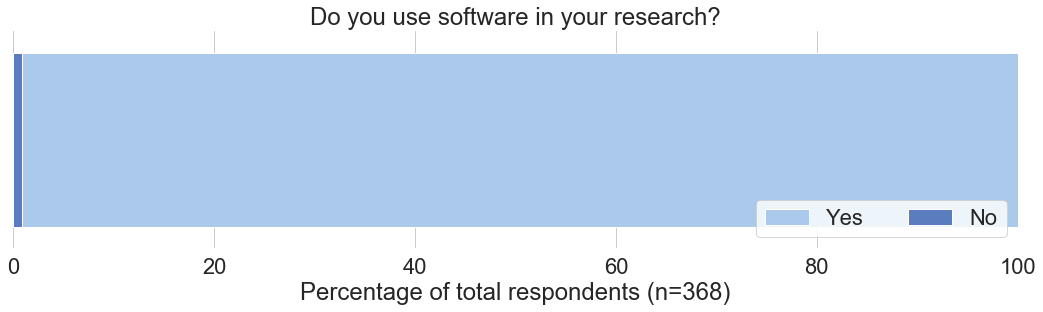

In [27]:
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=2, rc={'font.weight':'bold'})
fig, ax = plt.subplots(figsize=(18, 4))
sns.set_color_codes("pastel")
sns.barplot(x=100.0, y=['Yes'], label="Yes", color="b")
sns.set_color_codes("muted")
sns.barplot(x=no_percentage, y=[''], label="No", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), xlabel="Percentage of total respondents (n=368)", title="Do you use software in your research?")
sns.despine(left=True, bottom=True)

Make a plot using [pandas plotting tools](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) with [seaborn color tables](https://seaborn.pydata.org/tutorial/color_palettes.html): 

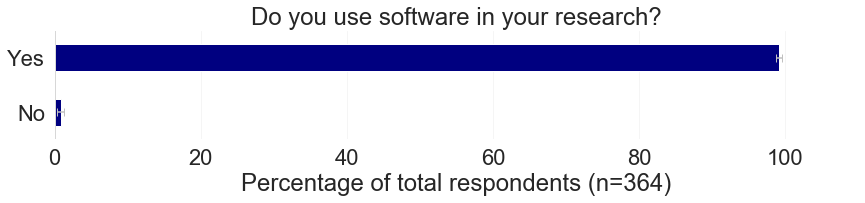

In [28]:
# figure width of 14.4 corresponds to Latex default \textwidth * 3
fig1 = df6.T.plot.barh(figsize=(14.4, 2), stacked=False, cmap=sns.light_palette("Navy", as_cmap=True, reverse=True), legend=False, xerr=[no_percentage_error, no_percentage_error], capsize=4, ecolor='silver')
fig1.grid(False)
fig1.grid(axis='x', color='whitesmoke')
fig1.set_title('Do you use software in your research?')
fig1.set_xlabel('Percentage of total respondents (n='+str(total_number)+')')
fig1.axvline(0, color='lightgray', lw=1.75)
fig1.set_xlim(0.0, 110.0)
fig1.spines['top'].set_visible(False)
fig1.spines['right'].set_visible(False)
fig1.spines['bottom'].set_visible(False)
fig1.spines['left'].set_visible(False)

Conclusions:

* In our survey of the solar physics community (n=364), we found that 99±0.5% of respondents use software in their research. The 1% looks like accidents, though.
* We used exactly the same question as the astrophysics community survey (see Figure 2 of Momcheva & Tollerud, 2015). They found that 100% of respondents (n=1142) use software in their research. 

# Question 7: Have you had formal training in programming?
🔲 **Yes, a lot (e.g. CS courses at an undergraduate or graduate level)**  
🔲 **Yes, a little (e.g. online classes, books, workshops)**  
🔲 **No**

### Training vs. Career

In [29]:
grouped7 = df.groupby(['Have you had formal training in programming?', 'How would you describe the stage of your career?'], sort=False)

In [30]:
# get the size of each group and unstack the multi-index labels
question_7_numbers = pd.DataFrame(grouped7.size()).unstack().T.reset_index(level=0, drop=True)

In [31]:
# reindex the dataframe to match the order of total_numbers_df
question_7_numbers = question_7_numbers.reindex(['Faculty, Staff Scientist, or Researcher', 'Postdoc', 'Graduate or Undergraduate Student', 'Software or Instrument Developer'])

In [32]:
# reorganize the columns to go from most to least experience
question_7_numbers = question_7_numbers[['Yes, a lot (e.g. CS courses at an undergraduate or graduate level)', 'Yes, a little (e.g. online classes, books, workshops)', 'No']]

In [33]:
question_7_percentages = question_7_numbers / total_numbers.values*100.
question_7_percentages

Have you had formal training in programming?,"Yes, a lot (e.g. CS courses at an undergraduate or graduate level)","Yes, a little (e.g. online classes, books, workshops)",No
How would you describe the stage of your career?,,,
"Faculty, Staff Scientist, or Researcher",26.829268,46.341463,26.829268
Postdoc,41.509434,50.943396,7.547170
Graduate or Undergraduate Student,51.190476,29.761905,19.047619
Software or Instrument Developer,63.636364,36.363636,NaN


For Questions 7, 8, 10, and 11, which required respondents to pick only one response from a list of options, we quantified the percent error in each response simply by applying the square-root rule for counting experiments (Taylor, 1997).

In [34]:
question_7_percent_err = (np.sqrt(question_7_numbers)) / total_numbers.values*100.
question_7_percent_err

Have you had formal training in programming?,"Yes, a lot (e.g. CS courses at an undergraduate or graduate level)","Yes, a little (e.g. online classes, books, workshops)",No
How would you describe the stage of your career?,,,
"Faculty, Staff Scientist, or Researcher",3.617658,4.754534,3.617658
Postdoc,8.849841,9.804061,3.773585
Graduate or Undergraduate Student,7.806474,5.952381,4.761905
Software or Instrument Developer,17.007534,12.856487,NaN


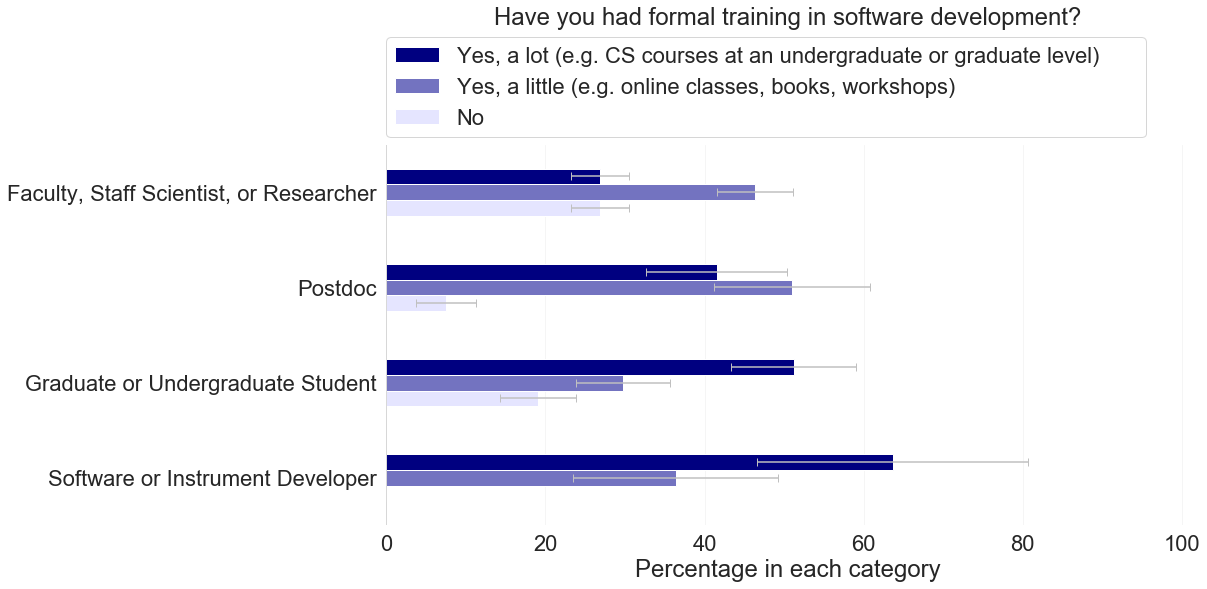

In [35]:
fig2 = question_7_percentages.plot.barh(figsize=(14.4, 7), stacked=False, cmap=sns.light_palette("Navy", as_cmap=True, reverse=True), xerr=question_7_percent_err, ecolor='silver', capsize=4)
fig2.grid(False)
fig2.grid(axis='x', color='whitesmoke')
fig2.set_title('Have you had formal training in software development?',y=1.3)
fig2.set_xlabel('Percentage in each category')
fig2.set_ylabel('')
fig2.axvline(0, color='lightgray', lw=1.75)
fig2.set_xlim(0.0, 101.0)
fig2.invert_yaxis() # match the order of the legend colors to the order of the bar colors
fig2.legend(bbox_to_anchor=(0., 1.02, 0.945, .102), loc='lower left', mode="expand", borderaxespad=0., ncol=1)
fig2.spines['top'].set_visible(False)
fig2.spines['right'].set_visible(False)
fig2.spines['bottom'].set_visible(False)
fig2.spines['left'].set_visible(False)
fig2.figure.savefig("Figure2.png",bbox_inches='tight',dpi=300)

In [36]:
grouped_7a = df.groupby(['Have you had formal training in programming?'], sort=False)

In [37]:
question_7a_numbers = pd.DataFrame(grouped_7a.size()).rename(columns={0: "Total Numbers"})

In [38]:
question_7a_numbers

,Total Numbers
Have you had formal training in programming?,
"Yes, a little (e.g. online classes, books, workshops)",155
"Yes, a lot (e.g. CS courses at an undergraduate or graduate level)",134
No,75


In [39]:
total_no_formal_training = question_7a_numbers['Total Numbers']['Yes, a little (e.g. online classes, books, workshops)'] + question_7a_numbers['Total Numbers']['No']
percentage_no_formal_training = (total_no_formal_training / len(df))*100.
percentage_err_no_formal_training = (np.sqrt(total_no_formal_training) / len(df))*100.
print(percentage_no_formal_training,"±",percentage_err_no_formal_training,"of respondents have no formal training in software development.")

63.18681318681318 ± 4.166415079149203 of respondents have no formal training in software development.


In [40]:
total_formal_training = question_7a_numbers['Total Numbers']['Yes, a lot (e.g. CS courses at an undergraduate or graduate level)']
percentage_formal_training = (total_formal_training / len(df))*100.
percentage_err_formal_training = (np.sqrt(total_formal_training) / len(df))*100.
print(percentage_formal_training,"±",percentage_err_formal_training,"of respondents have formal training in software development.")

36.81318681318682 ± 3.180174973294018 of respondents have formal training in software development.


### Training vs. Expertise

In [41]:
space = df['Which of these areas of solar physics do you work in? Check all that apply.'].str.contains('Space-Based').groupby(df['Have you had formal training in programming?']).sum()
ground = df['Which of these areas of solar physics do you work in? Check all that apply.'].str.contains('Ground-Based').groupby(df['Have you had formal training in programming?']).sum()
sims = df['Which of these areas of solar physics do you work in? Check all that apply.'].str.contains('Simulations').groupby(df['Have you had formal training in programming?']).sum()
theory = df['Which of these areas of solar physics do you work in? Check all that apply.'].str.contains('Theory').groupby(df['Have you had formal training in programming?']).sum()
inst = df['Which of these areas of solar physics do you work in? Check all that apply.'].str.contains('Instrumentation').groupby(df['Have you had formal training in programming?']).sum()

In [42]:
data_7b_numbers = {'Observational (Space-Based)': space, 'Observational (Ground-Based)': ground, 'Instrumentation': inst, 'Theory': theory, 'Numerical Simulations': sims}
question_7b_numbers = pd.DataFrame(data_7b_numbers)
question_7b_numbers

,Observational (Space-Based),Observational (Ground-Based),Instrumentation,Theory,Numerical Simulations
Have you had formal training in programming?,,,,,
No,56.0,35.0,21.0,28.0,29.0
"Yes, a little (e.g. online classes, books, workshops)",114.0,72.0,36.0,38.0,72.0
"Yes, a lot (e.g. CS courses at an undergraduate or graduate level)",105.0,62.0,36.0,39.0,70.0


In [43]:
data_7b_percentages = {'Observational (Space-Based)': space / df1a['All Participants']['Observational (Space-Based)'], 'Observational (Ground-Based)': ground / df1a['All Participants']['Observational (Ground-Based)'], 'Instrumentation': inst / df1a['All Participants']['Instrumentation'], 'Theory': theory / df1a['All Participants']['Theory'], 'Numerical Simulations': sims / df1a['All Participants']['Numerical Simulations']}
question_7b_percentages = pd.DataFrame(data_7b_percentages)*100.
question_7b_percentages

,Observational (Space-Based),Observational (Ground-Based),Instrumentation,Theory,Numerical Simulations
Have you had formal training in programming?,,,,,
No,20.363636,20.710059,22.580645,26.666667,16.959064
"Yes, a little (e.g. online classes, books, workshops)",41.454545,42.603550,38.709677,36.190476,42.105263
"Yes, a lot (e.g. CS courses at an undergraduate or graduate level)",38.181818,36.686391,38.709677,37.142857,40.935673


In [44]:
data_7b_percentage_err = {'Observational (Space-Based)': np.sqrt(space) / df1a['All Participants']['Observational (Space-Based)'], 'Observational (Ground-Based)': np.sqrt(ground) / df1a['All Participants']['Observational (Ground-Based)'], 'Instrumentation': np.sqrt(inst) / df1a['All Participants']['Instrumentation'], 'Theory': np.sqrt(theory) / df1a['All Participants']['Theory'], 'Numerical Simulations': np.sqrt(sims) / df1a['All Participants']['Numerical Simulations']}
question_7b_percentage_err = pd.DataFrame(data_7b_percentage_err)*100.
question_7b_percentage_err

,Observational (Space-Based),Observational (Ground-Based),Instrumentation,Theory,Numerical Simulations
Have you had formal training in programming?,,,,,
No,2.721205,3.500639,4.927501,5.039526,3.149219
"Yes, a little (e.g. online classes, books, workshops)",3.882574,5.020877,6.451613,5.870870,4.962153
"Yes, a lot (e.g. CS courses at an undergraduate or graduate level)",3.726164,4.659176,6.451613,5.947617,4.892749


Conclusions:
* Although 99±0.5% of respondents use software in their research and 91±5% often or occasionally write their own software, 63±4% have not had any formal training (e.g., computer science courses) at an undergraduate or graduate level.
* Students today are twice as likely to have a lot of formal training in programming compared with faculty, researchers, and staff scientists (51% compared with 27%).
* The amount of formal training does not vary with area of expertise.
* We used almost exactly the same question as the astrophysics community survey. They asked, "Have you had formal training in software development?" with the options of Yes, No, or A little (see Figure 6 in Momcheva & Tollerud, 2015). They found that only 8±1% of respondents received substantial training; however, their question did not define “a lot" or “a little". Also their survey was from 5 years ago. 

# Question 8: Which of the following statements is most applicable to you?
🔲 **I write mostly my own software.**  
🔲 **I mostly use software written by others.**  
🔲 **Somewhere in between.**

In [45]:
grouped8 = df.groupby(['Which of the following statements is most applicable to you?', 'How would you describe the stage of your career?'], sort=False)

In [46]:
question_8_numbers = pd.DataFrame(grouped8.size()).unstack().T.reset_index(level=0, drop=True)
question_8_numbers = question_8_numbers.reindex(['Faculty, Staff Scientist, or Researcher', 'Postdoc', 'Graduate or Undergraduate Student', 'Software or Instrument Developer'])
question_8_numbers = question_8_numbers[['I write mostly my own software.', 'Somewhere in between.', 'I mostly use software written by others.']]

In [47]:
question_8_percentages = question_8_numbers / total_numbers.values*100.
question_8_percentages

Which of the following statements is most applicable to you?,I write mostly my own software.,Somewhere in between.,I mostly use software written by others.
How would you describe the stage of your career?,,,
"Faculty, Staff Scientist, or Researcher",34.146341,57.560976,8.292683
Postdoc,30.188679,60.377358,9.433962
Graduate or Undergraduate Student,33.333333,58.333333,8.333333
Software or Instrument Developer,45.454545,45.454545,9.090909


In [48]:
question_8_percent_err = (np.sqrt(question_8_numbers)) / total_numbers.values*100.
question_8_percent_err

Which of the following statements is most applicable to you?,I write mostly my own software.,Somewhere in between.,I mostly use software written by others.
How would you describe the stage of your career?,,,
"Faculty, Staff Scientist, or Researcher",4.081268,5.298917,2.011271
Postdoc,7.547170,10.673310,4.218996
Graduate or Undergraduate Student,6.299408,8.333333,3.149704
Software or Instrument Developer,14.373989,14.373989,6.428243


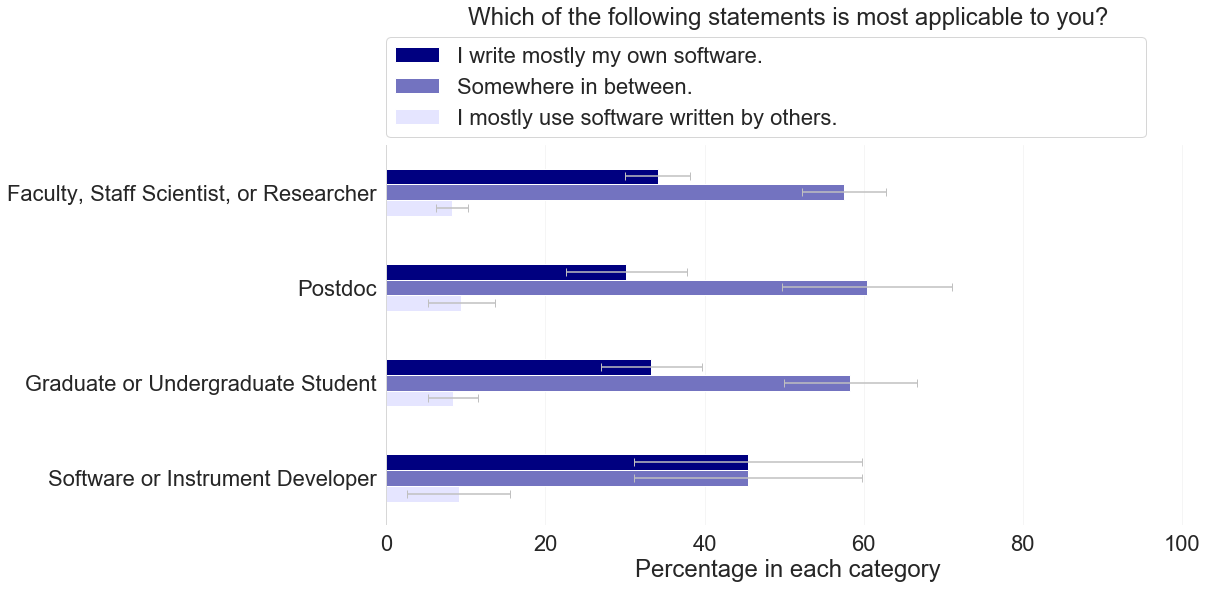

In [49]:
fig3 = question_8_percentages.plot.barh(figsize=(14.4, 7), stacked=False, cmap=sns.light_palette("Navy", as_cmap=True, reverse=True), xerr=question_8_percent_err, ecolor='silver', capsize=4)
fig3.grid(False)
fig3.grid(axis='x', color='whitesmoke')
fig3.set_title('Which of the following statements is most applicable to you?',y=1.3)
fig3.set_xlabel('Percentage in each category')
fig3.set_ylabel('')
fig3.axvline(0, color='lightgray', lw=1.75)
fig3.set_xlim(0.0, 101.0)
fig3.invert_yaxis()
fig3.legend(bbox_to_anchor=(0., 1.02, 0.945, .102), loc='lower left', mode="expand", borderaxespad=0., ncol=1)
fig3.spines['top'].set_visible(False)
fig3.spines['right'].set_visible(False)
fig3.spines['bottom'].set_visible(False)
fig3.spines['left'].set_visible(False)
fig3.figure.savefig("Figure3.png",bbox_inches='tight',dpi=300)

Are the people who write mostly their own software better trained? Maybe marginally.

In [50]:
mostly_write_own_software = df.loc[df['Which of the following statements is most applicable to you?'] == 'I write mostly my own software.']
highly_trained = len(mostly_write_own_software.loc[mostly_write_own_software['Have you had formal training in programming?'] == 'Yes, a lot (e.g. CS courses at an undergraduate or graduate level)'])
print("Percentage of highly trained people who write their own software:",(highly_trained/len(mostly_write_own_software)*100.),"plus or minus",(np.sqrt(highly_trained)/len(mostly_write_own_software)*100.))

Percentage of highly trained people who write their own software: 44.354838709677416 plus or minus 5.98080523152876


In [51]:
print(100 * (question_8_numbers['I write mostly my own software.'].sum() + question_8_numbers['Somewhere in between.'].sum()) / len(df),"plus or minus",(100 * (np.sqrt((question_8_numbers['I write mostly my own software.'].sum() + question_8_numbers['Somewhere in between.'].sum()))) /len(df)),"percent of people often or occasionally write their own software.")

91.48351648351648 plus or minus 5.013265821674357 percent of people often or occasionally write their own software.


Conclusions:
* 92% of respondents often or occasionally write their own software.
* This doesn't really vary by stage of career. 
* People who write mostly their own software are no better trained than everyone else: 44±6% of people who write their own software reported "a lot (e.g., computer science courses)" of formal training, compared with 37±3% overall.
* We used exactly the same question as the astrophysics community survey (see Figure 3 in Momcheva & Tollerud, 2015). They also found that roughly a third of respondents wrote mostly their own software and that this percentage did not vary much by career stage.

# Question 9: Which of the following have you personally utilized in your work within the last year? Check all that apply.

🔲 **SolarSoft  
🔲 Python  
🔲 SunPy  
🔲 Shell Scripting  
🔲 C  
🔲 C++  
🔲 Fortran  
🔲 IRAF  
🔲 Perl  
🔲 Javascript  
🔲 Julia  
🔲 Matlab  
🔲 Java  
🔲 R  
🔲 SQL  
🔲 Ruby  
🔲 HTML / CSS  
🔲 Spreadsheets (e.g. Excel)  
🔲 Mathematica  
🔲 MPI  
🔲 Github (or similar)  
🔲 Other (Respondents can write in their own description.)**

In [52]:
breadth = []
for i in range(len(df)):
    breadth.append(len(df['Which of the following have you personally utilized in your work within the last year?'][i].split(", ")))

In [53]:
df = df.assign(Breadth=pd.Series(breadth).values)

In [54]:
fssr = df.loc[df['How would you describe the stage of your career?'] == 'Faculty, Staff Scientist, or Researcher']
postdoc = df.loc[df['How would you describe the stage of your career?'] == 'Postdoc']
gs = df.loc[df['How would you describe the stage of your career?'] == 'Graduate or Undergraduate Student']
us = df.loc[df['How would you describe the stage of your career?'] == 'Software or Instrument Developer']
print("The average number of software tools used by all participants is:",df['Breadth'].median())
print("The average number of software tools used by Faculty, Staff Scientist, or Researcher is:",fssr['Breadth'].median())
print("The average number of software tools used by Postdocs is:",postdoc['Breadth'].median())
print("The average number of software tools used by Graduate or Undergraduate Students is:",gs['Breadth'].median())
print("The average number of software tools used by Software or Instrument Developers is:",us['Breadth'].median())

The average number of software tools used by all participants is: 5.0
The average number of software tools used by Faculty, Staff Scientist, or Researcher is: 5.0
The average number of software tools used by Postdocs is: 5.0
The average number of software tools used by Graduate or Undergraduate Students is: 4.0
The average number of software tools used by Software or Instrument Developers is: 7.0


In [55]:
def count_all_the_software_tools(list_of_all_values):
    """
    
    Input: list_of_all_values, list of lists containing all the responses to the question:
    
    "Which of the software tools following have you personally utilized in your work within the last year? Check all that apply."
    
    """
    IDL_exclusives = 0
    Python_exclusives = 0
    IDL_Python_both = 0
    proprietary_count = 0
    free_count = 0
    IDL_count = 0
    SolarSoft_count = 0
    Python_count = 0
    SunPy_count = 0
    Shell_count = 0
    c_count = 0
    cp_count = 0
    Fortran_count = 0
    IRAF_count = 0
    Perl_count = 0
    Javascript_count = 0
    Julia_count = 0
    Matlab_count = 0
    Java_count = 0
    R_count = 0
    SQL_count = 0
    Ruby_count = 0
    HTML_count = 0
    Spreadsheets_count = 0
    Mathematica_count = 0
    MPI_count = 0
    Github_count = 0
    for i in range(len(list_of_all_values)):
        single_row_list = list_of_all_values[i].split(", ")
        if "IDL" in single_row_list:
            IDL_count += 1
            proprietary_count += 1
        if "SolarSoft" in single_row_list:
            SolarSoft_count += 1
            proprietary_count += 1
        if "Python" in single_row_list:
            Python_count += 1
            free_count += 1
        if "SunPy" in single_row_list:
            SunPy_count += 1
            free_count += 1
        if "Shell scripting" in single_row_list:
            Shell_count += 1
            free_count += 1
        if ("C") in single_row_list:
            c_count += 1
            free_count += 1
        if "C++" in single_row_list:
            cp_count += 1
            free_count += 1
        if "Fortran" in single_row_list:
            Fortran_count += 1
            free_count += 1
        if "IRAF" in single_row_list:
            IRAF_count += 1
            free_count += 1 # was proprietary, now free
        if "Perl" in single_row_list:
            Perl_count += 1
            free_count += 1
        if "Javascript" in single_row_list:
            Javascript_count += 1
            free_count += 1
        if "Julia" in single_row_list:
            Julia_count += 1
            free_count += 1
        if "MATLAB" in single_row_list:
            Matlab_count += 1
            proprietary_count += 1
        if "Java" in single_row_list:
            Java_count += 1
            free_count += 1
        if "R" in single_row_list:
            R_count += 1
            free_count += 1
        if "SQL" in single_row_list:
            SQL_count += 1
            free_count += 1
        if "Ruby" in single_row_list:
            Ruby_count += 1
            free_count += 1
        if "HTML/CSS" in single_row_list:
            HTML_count += 1
            free_count += 1
        if "Spreadsheets (e.g. Excel)" in single_row_list:
            Spreadsheets_count += 1
            # unclear if proprietary or free; some are proprietary, some are free so no count either way for this
        if "Mathematica" in single_row_list:
            Mathematica_count += 1
            proprietary_count += 1
        if "MPI" in single_row_list:
            MPI_count += 1
            # could be open MPI or MPI so no count either way for this
        if "Github (or similar)" in single_row_list:
            Github_count += 1
        if ("IDL" in single_row_list and "Python" not in single_row_list):
            IDL_exclusives += 1
        if ("Python" in single_row_list and "IDL" not in single_row_list):
            Python_exclusives += 1
        if ("IDL" in single_row_list and "Python" in single_row_list):
            IDL_Python_both += 1
    software_names = ["IDL", "SolarSoft", "Python", "SunPy", "Shell Scripting", "C", "C++", "Fortran", "IRAF", "Perl", "Javascript", "Julia", "MATLAB", "Java", "R", "SQL", "Ruby", "HTML / CSS", "Spreadsheets (e.g. Excel)", "Mathematica", "MPI", "Github (or similar)"]
    user_counts = [IDL_count, SolarSoft_count, Python_count, SunPy_count, Shell_count, c_count, cp_count, Fortran_count, IRAF_count, Perl_count, Javascript_count, Julia_count, Matlab_count, Java_count, R_count, SQL_count, Ruby_count, HTML_count, Spreadsheets_count, Mathematica_count, MPI_count, Github_count]
    idl_vs_python = [IDL_exclusives, Python_exclusives, IDL_Python_both]
    return user_counts, proprietary_count, free_count, idl_vs_python

### Scientific Stack vs. Career

In [56]:
# All participants
list_of_all_values_all = df['Which of the following have you personally utilized in your work within the last year?'].tolist()
user_counts_all, proprietary_count_all, free_count_all, idl_vs_python_all  = count_all_the_software_tools(list_of_all_values_all)
user_percentages = (np.array(user_counts_all)/total_responses) * 100.

# Faculty, Staff Scientist, or Researcher
fssr = df['How would you describe the stage of your career?'] == 'Faculty, Staff Scientist, or Researcher'
list_of_all_values_fssr = df['Which of the following have you personally utilized in your work within the last year?'][fssr].tolist()
user_counts_fssr, proprietary_count_fssr, free_count_fssr, idl_vs_python_fssr = count_all_the_software_tools(list_of_all_values_fssr)
user_percentages_fssr = (np.array(user_counts_fssr)/(total_numbers['Total Numbers']['Faculty, Staff Scientist, or Researcher'])) * 100.

# Postdocs
postdoc = df['How would you describe the stage of your career?'] == 'Postdoc'
list_of_all_values_pd = df['Which of the following have you personally utilized in your work within the last year?'][postdoc].tolist()
user_counts_pd, proprietary_count_pd, free_count_pd, idl_vs_python_pd = count_all_the_software_tools(list_of_all_values_pd)
user_percentages_pd = (np.array(user_counts_pd)/(total_numbers['Total Numbers']['Postdoc'])) * 100.

# Graduate or Undergraduate Students
gs = df['How would you describe the stage of your career?'] == 'Graduate or Undergraduate Student'
list_of_all_values_gs = df['Which of the following have you personally utilized in your work within the last year?'][gs].tolist()
user_counts_gs, proprietary_count_gs, free_count_gs, idl_vs_python_gs = count_all_the_software_tools(list_of_all_values_gs)
user_percentages_gs = (np.array(user_counts_gs)/(total_numbers['Total Numbers']['Graduate or Undergraduate Student'])) * 100.

# Software or Instrument Developers
us = df['How would you describe the stage of your career?'] == 'Software or Instrument Developer'
list_of_all_values_us = df['Which of the following have you personally utilized in your work within the last year?'][us].tolist()
user_counts_us, proprietary_count_us, free_count_us, idl_vs_python_us = count_all_the_software_tools(list_of_all_values_us)
user_percentages_us = (np.array(user_counts_us)/(total_numbers['Total Numbers']['Software or Instrument Developer'])) * 100.

In [57]:
software_names = ["IDL", "SolarSoft", "Python", "SunPy", "Shell Scripting", "C", "C++", "Fortran", "IRAF", "Perl", "Javascript", "Julia", "MATLAB", "Java", "R", "SQL", "Ruby", "HTML / CSS", "Spreadsheets (e.g. Excel)", "Mathematica", "MPI", "Github (or similar)"]

df9 = pd.DataFrame({'All Participants': list(user_percentages), 
                    'Faculty, Staff Scientist, or Researcher': list(user_percentages_fssr), 
                    'Postdoc': list(user_percentages_pd),
                    'Graduate or Undergraduate Student': list(user_percentages_gs),
                    'Software or Instrument Developer': list(user_percentages_us)},
                    index=software_names)
df9

,All Participants,"Faculty, Staff Scientist, or Researcher",Postdoc,Graduate or Undergraduate Student,Software or Instrument Developer
IDL,73.076923,78.048780,75.471698,59.523810,72.727273
SolarSoft,56.868132,61.463415,60.377358,45.238095,50.000000
Python,66.208791,58.536585,75.471698,78.571429,68.181818
SunPy,37.087912,31.707317,39.622642,50.000000,31.818182
Shell Scripting,39.010989,40.975610,35.849057,32.142857,54.545455
C,18.681319,20.975610,11.320755,13.095238,36.363636
C++,16.208791,15.609756,16.981132,14.285714,27.272727
Fortran,34.890110,40.487805,32.075472,29.761905,9.090909
IRAF,2.472527,3.414634,0.000000,2.380952,0.000000
Perl,6.868132,10.243902,0.000000,2.380952,9.090909


Some rows have an 'All Participants' value of less than 5%:

In [58]:
df9[df9['All Participants'] <= 5.0 ]

,All Participants,"Faculty, Staff Scientist, or Researcher",Postdoc,Graduate or Undergraduate Student,Software or Instrument Developer
IRAF,2.472527,3.414634,0.000000,2.380952,0.000000
Julia,3.021978,3.414634,5.660377,1.190476,0.000000
Java,3.571429,2.926829,0.000000,1.190476,27.272727
R,4.670330,4.878049,5.660377,2.380952,9.090909
Ruby,0.549451,0.487805,1.886792,0.000000,0.000000


Plot all software tools used by 5% or more of respondents:

In [59]:
df9 = df9[df9['All Participants'] >= 5.0 ]

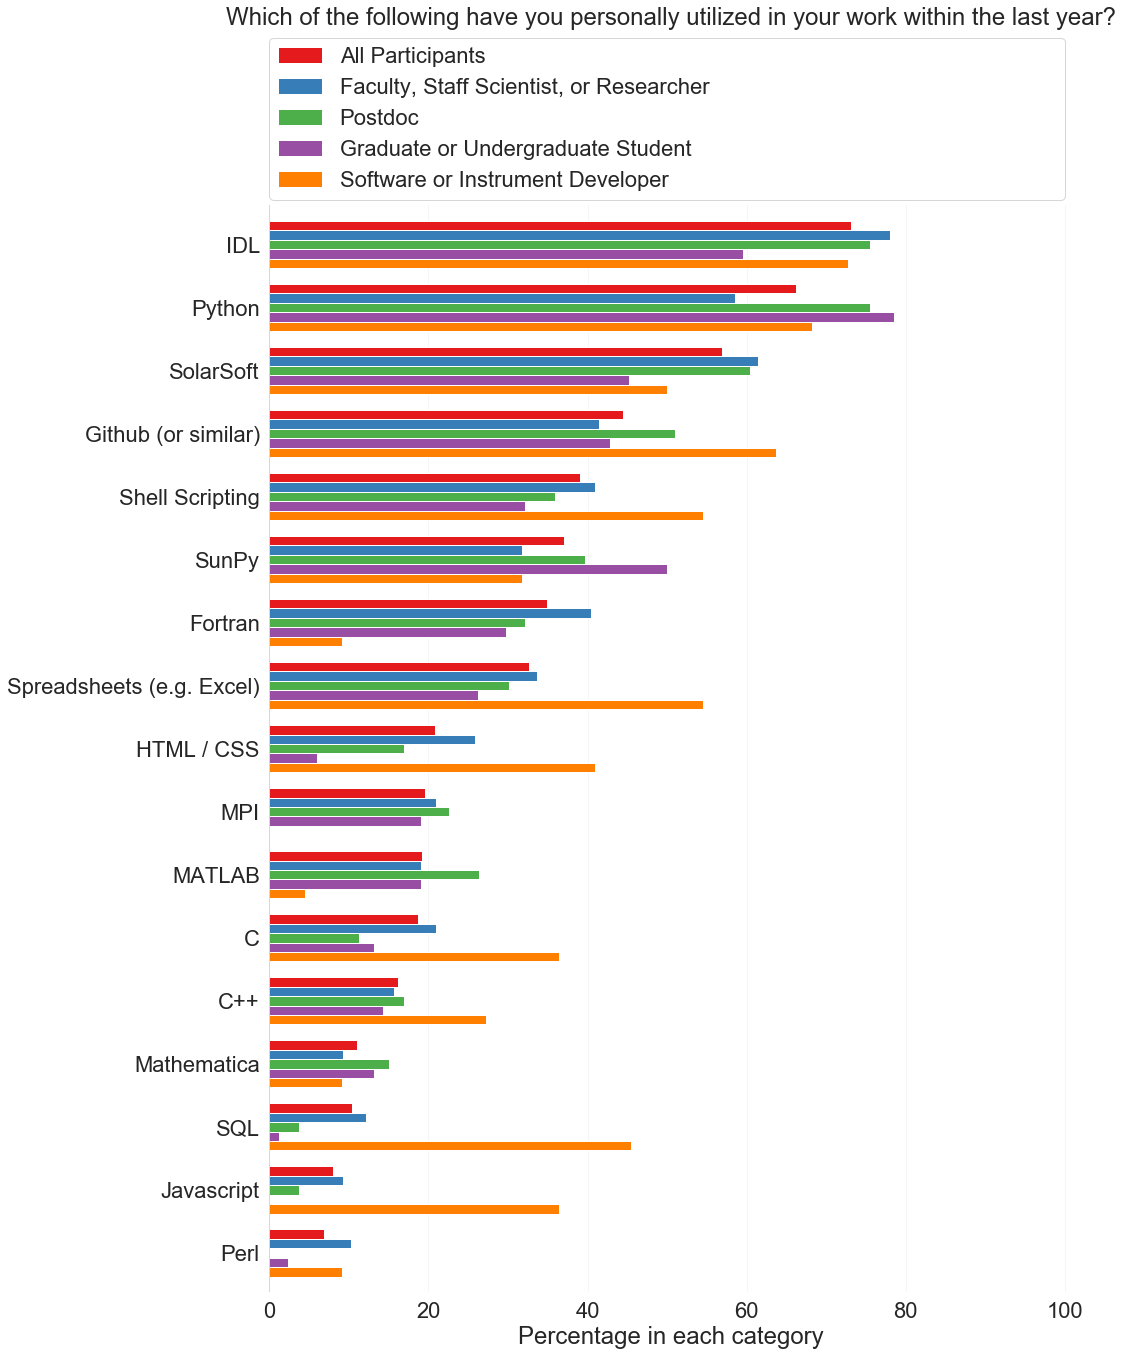

In [60]:
fig4a = df9.sort_values(by='All Participants', ascending=False).plot.barh(figsize=(14.4, 20),
                                                                          cmap=ListedColormap(sns.color_palette("Set1", 5).as_hex()),
                                                                          stacked=False, width=0.75)
fig4a.grid(False)
fig4a.grid(axis='x', color='whitesmoke')
fig4a.set_title('Which of the following have you personally utilized in your work within the last year?', y=1.16)
fig4a.set_xlabel('Percentage in each category')
fig4a.set_xlim(0.0, 101.0)
fig4a.axvline(0, color='lightgray', lw=1.75)
fig4a.invert_yaxis()
fig4a.legend(bbox_to_anchor=(0., 1.005, 0.99, .1005), loc='lower left', mode="expand", borderaxespad=0., ncol=1)
fig4a.spines['top'].set_visible(False)
fig4a.spines['right'].set_visible(False)
fig4a.spines['bottom'].set_visible(False)
fig4a.spines['left'].set_visible(False)
fig4a.figure.savefig("Figure4a.png",bbox_inches='tight',dpi=300)

In [61]:
df9a = pd.DataFrame({'All Participants': list([proprietary_count_all, free_count_all, (user_counts_all[2]/user_counts_all[0])]), 
                    'Faculty, Staff Scientist, or Researcher': list([proprietary_count_fssr, free_count_fssr, (user_counts_fssr[2]/user_counts_fssr[0])]), 
                    'Postdoc': list([proprietary_count_pd, free_count_pd, (user_counts_pd[2]/user_counts_pd[0])]),
                    'Graduate or Undergraduate Student': list([proprietary_count_gs, free_count_gs, (user_counts_gs[2]/user_counts_gs[0])]),
                    'Software or Instrument Developer': list([proprietary_count_us, free_count_us, (user_counts_us[2]/user_counts_us[0])])},
                    index=['Proprietary Software', 'Open Source Software', 'Ratio of Python to IDL Users (Python/IDL)'])
df9a

,All Participants,"Faculty, Staff Scientist, or Researcher",Postdoc,Graduate or Undergraduate Student,Software or Instrument Developer
Proprietary Software,583.000000,344.00,94.0,115.00,30.0000
Open Source Software,992.000000,576.00,132.0,197.00,87.0000
Ratio of Python to IDL Users (Python/IDL),0.906015,0.75,1.0,1.32,0.9375


In [62]:
print("Percentage of Python and IDL users across all participants:", (idl_vs_python_all[2]/(len(df)))*100.)

Percentage of Python and IDL users across all participants: 45.32967032967033


In [63]:
exclusive_idl_all = (idl_vs_python_all[0]/len(df))*100.
exclusive_idl_fssr = (idl_vs_python_fssr[0]/(total_numbers['Total Numbers']['Faculty, Staff Scientist, or Researcher']))*100.
exclusive_idl_pd = (idl_vs_python_pd[0]/(total_numbers['Total Numbers']['Postdoc']))*100.
exclusive_idl_gs = (idl_vs_python_gs[0]/(total_numbers['Total Numbers']['Graduate or Undergraduate Student']))*100.
exclusive_idl_us = (idl_vs_python_us[0]/(total_numbers['Total Numbers']['Software or Instrument Developer']))*100.
exclusive_python_all = (idl_vs_python_all[1]/len(df))*100.
exclusive_python_fssr = (idl_vs_python_fssr[1]/(total_numbers['Total Numbers']['Faculty, Staff Scientist, or Researcher']))*100.
exclusive_python_pd = (idl_vs_python_pd[1]/(total_numbers['Total Numbers']['Postdoc']))*100.
exclusive_python_gs = (idl_vs_python_gs[1]/(total_numbers['Total Numbers']['Graduate or Undergraduate Student']))*100.
exclusive_python_us = (idl_vs_python_us[1]/(total_numbers['Total Numbers']['Software or Instrument Developer']))*100.

In [64]:
exclusive_names = ["Participants who use IDL and do not use Python", "Participants who use Python and do not use IDL"]

df9b = pd.DataFrame({'All Participants': [exclusive_idl_all, exclusive_python_all], 
                    'Faculty, Staff Scientist, or Researcher': [exclusive_idl_fssr, exclusive_python_fssr], 
                    'Postdoc': [exclusive_idl_pd, exclusive_python_pd],
                    'Graduate or Undergraduate Student': [exclusive_idl_gs, exclusive_python_gs],
                    'Software or Instrument Developer': [exclusive_idl_us, exclusive_python_us]},
                    index=exclusive_names)
df9b.T

,Participants who use IDL and do not use Python,Participants who use Python and do not use IDL
All Participants,27.747253,20.879121
"Faculty, Staff Scientist, or Researcher",33.170732,13.658537
Postdoc,22.641509,22.641509
Graduate or Undergraduate Student,16.666667,35.714286
Software or Instrument Developer,31.818182,27.272727


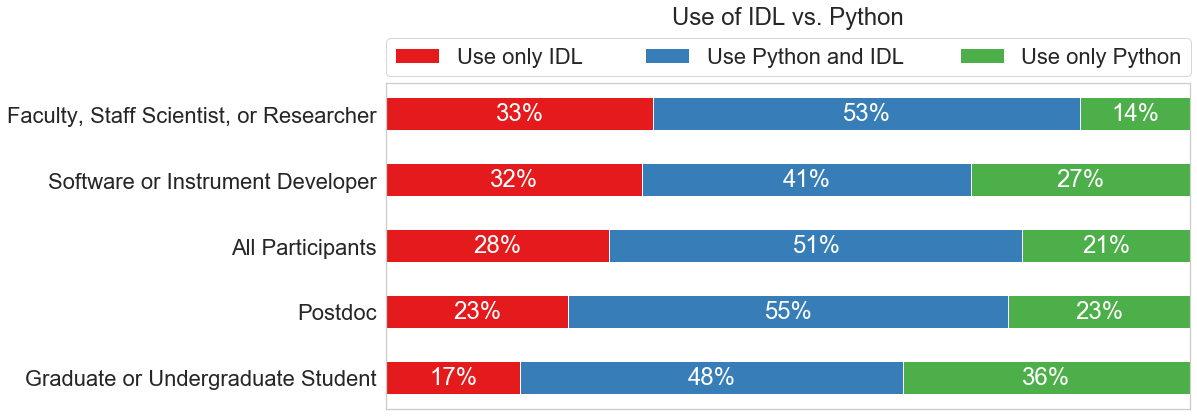

In [65]:
both_python_idl_all = 100 - exclusive_idl_all - exclusive_python_all
both_python_idl_fssr = 100 - exclusive_idl_fssr - exclusive_python_fssr
both_python_idl_pd = 100 - exclusive_idl_pd - exclusive_python_pd
both_python_idl_gs = 100 - exclusive_idl_gs - exclusive_python_gs
both_python_idl_us = 100 - exclusive_idl_us - exclusive_python_us
both_names = ["Use only IDL   ", "Use Python and IDL  ", "Use only Python"]

ddata4c = {
    'Faculty, Staff Scientist, or Researcher': [exclusive_idl_fssr, both_python_idl_fssr, exclusive_python_fssr],
    'Software or Instrument Developer': [exclusive_idl_us, both_python_idl_us, exclusive_python_us],
    'All Participants': [exclusive_idl_all, both_python_idl_all, exclusive_python_all],
    'Postdoc': [exclusive_idl_pd, both_python_idl_pd, exclusive_python_pd],
    'Graduate or Undergraduate Student': [exclusive_idl_gs, both_python_idl_gs, exclusive_python_gs],
}

labels4c = list(ddata4c.keys())
data4c = np.array(list(ddata4c.values()))
data4c_cum = data4c.cumsum(axis=1)
category_colors4c = ListedColormap(sns.color_palette("Set1", 3).as_hex())(np.linspace(0.15, 0.85, data4c.shape[1]))

fig4c, ax4c = plt.subplots(figsize=(14.4, 6))
ax4c.invert_yaxis()
ax4c.xaxis.set_visible(False)
ax4c.set_xlim(0, np.sum(data4c, axis=1).max())

for i, (colname, color) in enumerate(zip(both_names, category_colors4c)):
    widths = data4c[:, i]
    starts = data4c_cum[:, i] - widths
    ax4c.barh(labels4c, widths, left=starts, height=0.5,
              label=colname, color=color)
    xcenters = starts + widths / 2

    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax4c.text(x, y, '%.0f%%' % round(data4c[y, i]), ha='center', va='center', color=text_color)
        
ax4c.set_title('Use of IDL vs. Python', y=1.16)
ax4c.legend(ncol=len(both_names), bbox_to_anchor=(0., 1.02), borderaxespad=0., loc='lower left');
fig4c.savefig("Figure4c.png",bbox_inches='tight',dpi=300)

### Scientific Stack vs. Expertise

In [66]:
# Observational (Space-Based)
space = df['Which of these areas of solar physics do you work in? Check all that apply.'].str.contains('Space-Based')
list_of_all_values_space= df['Which of the following have you personally utilized in your work within the last year?'][space].tolist()
total_space = len(list_of_all_values_space)
user_counts_space, proprietary_count_space, free_count_space, idl_vs_python_space = count_all_the_software_tools(list_of_all_values_space)
user_percentages_space = (np.array(user_counts_space)/total_space) * 100.

# Observational (Ground-Based)
obs = df['Which of these areas of solar physics do you work in? Check all that apply.'].str.contains('Ground-Based')
list_of_all_values_obs= df['Which of the following have you personally utilized in your work within the last year?'][obs].tolist()
total_obs = len(list_of_all_values_obs)
user_counts_obs, proprietary_count_obs, free_count_obs, idl_vs_python_obs = count_all_the_software_tools(list_of_all_values_obs)
user_percentages_obs = (np.array(user_counts_obs)/total_obs) * 100.

# Instrumentation
inst = df['Which of these areas of solar physics do you work in? Check all that apply.'].str.contains('Instrumentation')
list_of_all_values_inst= df['Which of the following have you personally utilized in your work within the last year?'][inst].tolist()
total_inst = len(list_of_all_values_inst)
user_counts_inst, proprietary_count_inst, free_count_inst, idl_vs_python_inst = count_all_the_software_tools(list_of_all_values_inst)
user_percentages_inst = (np.array(user_counts_inst)/total_inst) * 100.

# Numerical Simulations
sim = df['Which of these areas of solar physics do you work in? Check all that apply.'].str.contains('Numerical Simulations')
list_of_all_values_sim = df['Which of the following have you personally utilized in your work within the last year?'][sim].tolist()
total_sim = len(list_of_all_values_sim)
user_counts_sim, proprietary_count_sim, free_count_sim, idl_vs_python_sim = count_all_the_software_tools(list_of_all_values_sim)
user_percentages_sim = (np.array(user_counts_sim)/total_sim) * 100.

# Theory
theory = df['Which of these areas of solar physics do you work in? Check all that apply.'].str.contains('Theory')
list_of_all_values_theory = df['Which of the following have you personally utilized in your work within the last year?'][theory].tolist()
total_theory = len(list_of_all_values_theory)
user_counts_theory, proprietary_count_theory, free_count_theory, idl_vs_python_theory = count_all_the_software_tools(list_of_all_values_theory)
user_percentages_theory = (np.array(user_counts_theory)/total_theory) * 100.

In [67]:
df9c = pd.DataFrame({'Observational (Space-Based)': list(user_percentages_space), 
                    'Observational (Ground-Based)': list(user_percentages_obs), 
                    'Instrumentation': list(user_percentages_inst),
                    'Numerical Simulations': list(user_percentages_sim),
                    'Theory': list(user_percentages_theory)},
                    index=software_names)
df9c

,Observational (Space-Based),Observational (Ground-Based),Instrumentation,Numerical Simulations,Theory
IDL,79.272727,80.473373,84.946237,73.684211,65.714286
SolarSoft,67.272727,66.272189,66.666667,53.801170,41.904762
Python,65.454545,65.088757,65.591398,71.929825,69.523810
SunPy,41.454545,40.828402,36.559140,39.181287,32.380952
Shell Scripting,39.636364,39.644970,47.311828,46.783626,42.857143
C,17.090909,18.934911,18.279570,18.128655,18.095238
C++,12.727273,13.609467,17.204301,21.637427,15.238095
Fortran,29.454545,33.136095,20.430108,59.064327,59.047619
IRAF,2.909091,4.733728,5.376344,1.754386,1.904762
Perl,8.000000,7.692308,9.677419,7.602339,4.761905


Conclusions:
* Overall, respondents listed 42 different software tools and the average respondent used 5 tools in the past year.
* 73% of all respondents use IDL and 66% of all respondents use Python. 
    * 27% use IDL exclusively, and 21% use Python exclusively.
    * 17% of our sample of graduate and undergraduate students use IDL exclusively; 33% of our sample of faculty, staff scientists, or researchers use IDL exclusively.
    * 36% of our sample of graduate and undergraduate students use Python exclusively; 14% of our sample of faculty, staff scientists, or researchers use Python exclusively.
* We used almost exactly the same question as the astrophysics community survey (see Figure 10 in Momcheva & Tollerud, 2015). 
    * 79% of our sample solar physics graduate students use Python; 80±5% of the astrophysics graduate student population sampled by Momcheva & Tollerud (2015) use Python.
    * 60% of our sample of solar physics graduate student use IDL; 41±5% of the astrophysics graduate student population sampled by Momcheva & Tollerud (2015) use IDL.
    * Figure 10 of Momcheva & Tollerud (2015) shows that Python is not only the most popular programming language within their sample of the astrophysics community, but it is also the most popular within every individual career category.
    * Our survey results show that Python is the most popular programming language only among students; IDL and Python are at parity for postdocs, and IDL is more popular than Python for faculty, staff scientists, researchers, software developers, and instrument developers.
* Fortran is still quite popular (used by 35% of respondents).
* Adoption of version-control tools like Github is consistent across the board (at slightly more than 40%), with the exception of the 'Software and Instrument Developers' category, 60% of whom use version control. Actually, the option we gave is ambiguous. In retrospect, we should have provided “Git, Github, or similar" instead of “Github (or similar)" as an option in Question 9.
* Other tools used by less than or equal to 5% of respondents include Julia, R, Java, IRAF, Ruby, Maple, CASA, COBOL, CUDA, OMP, ANA, C# & .NET, ZEMAX, FreeCAD, LuaJIT, OpenMP, PhP, Octave, and origin.

# Question 10: Have you cited software papers in your published research?
🔲 **Yes    
🔲 Sometimes    
🔲 No**    

In [68]:
total_number = df['Have you cited software papers in your published research?'].count()
yes_numbers = len(df.loc[df['Have you cited software papers in your published research?'] == 'Yes'])
no_numbers = len(df.loc[df['Have you cited software papers in your published research?'] == 'No'])
some_numbers = len(df.loc[df['Have you cited software papers in your published research?'] == 'Sometimes'])

In [69]:
data10 = {'Participants': [yes_numbers, some_numbers, no_numbers]}
data10_numbers = pd.DataFrame(data10, index=['Yes', 'Sometimes', 'No'], columns = ['Participants'])
data10_numbers

,Participants
Yes,153
Sometimes,114
No,97


In [70]:
data10_percentages = data10_numbers.divide(len(df))*100.
data10_percentages

,Participants
Yes,42.032967
Sometimes,31.318681
No,26.648352


In [71]:
data10_percent_err = (np.sqrt(data10_numbers)).divide(len(df))*100.
data10_percent_err

,Participants
Yes,3.398164
Sometimes,2.933263
No,2.705730


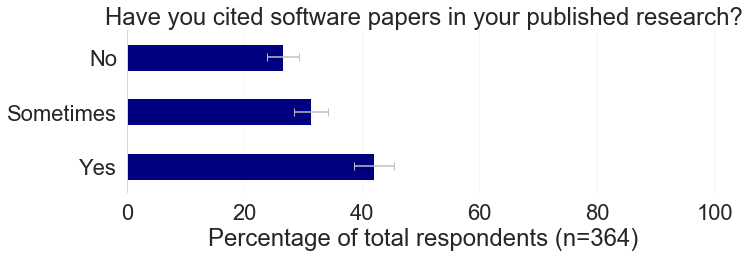

In [72]:
fig5 = data10_percentages.plot.barh(figsize=(14.4, 3), stacked=False, legend=False, cmap=sns.light_palette("Navy", as_cmap=True, reverse=True), xerr=data10_percent_err, ecolor='silver', capsize=4)
fig5.grid(False)
fig5.grid(axis='x', color='whitesmoke')
fig5.set_title('Have you cited software papers in your published research?')
fig5.set_xlabel('Percentage of total respondents (n='+str(total_number)+')')
fig5.axvline(0, color='lightgray', lw=1.75)
fig5.set_xlim(0.0, 101.0)
fig5.set_aspect(9.25)
fig5.spines['top'].set_visible(False)
fig5.spines['right'].set_visible(False)
fig5.spines['bottom'].set_visible(False)
fig5.spines['left'].set_visible(False)
fig5.figure.savefig("Figure5.png",bbox_inches='tight',dpi=300)

In [73]:
total_sometimes_cite_software = data10_numbers['Participants']['Yes'] + data10_numbers['Participants']['Sometimes']
percentage_total_sometimes_cite_software = (total_sometimes_cite_software / len(df))*100.
percentage_err_total_sometimes_cite_software = (np.sqrt(total_sometimes_cite_software) / len(df))*100.
print("Most",percentage_total_sometimes_cite_software,"±",percentage_err_total_sometimes_cite_software,"solar physicists have cited scientific software in their research.")

Most 73.35164835164835 ± 4.489047977573679 solar physicists have cited scientific software in their research.


# Question 11: If 'No’ for the previous question: Why haven’t you cited software in your research?

🔲 **I am not sure how to appropriately cite software  
🔲 I do not think it is necessary  
🔲 I do not think software belongs in citations**  

In [74]:
total_number = df['Why haven’t you cited software in your research?'].count()
not_sure_numbers = len(df.loc[df['Why haven’t you cited software in your research?'] == 'I am not sure how to appropriately cite software'])
not_necessary_numbers = len(df.loc[df['Why haven’t you cited software in your research?'] == 'I do not think it is necessary'])
not_interested_numbers = len(df.loc[df['Why haven’t you cited software in your research?'] == 'I do not think software belongs in citations'])
not_sure_percentage = (not_sure_numbers/total_number)*100.
not_necessary_percentage = (not_necessary_numbers/total_number)*100.
not_interested_percentage = (not_interested_numbers/total_number)*100.

In [75]:
data11 = {'Participants that answered Question 10 with No': [not_sure_numbers, not_necessary_numbers, not_interested_numbers]}
data11_numbers = pd.DataFrame(data11, index=['I am not sure how to appropriately cite software', 'I do not think it is necessary', 'I do not think software belongs in citations'], columns = ['Participants that answered Question 10 with No'])
data11_numbers

,Participants that answered Question 10 with No
I am not sure how to appropriately cite software,46
I do not think it is necessary,27
I do not think software belongs in citations,13


In [76]:
data11_percentages = data11_numbers.divide(total_number)*100.
data11_percentages

,Participants that answered Question 10 with No
I am not sure how to appropriately cite software,53.488372
I do not think it is necessary,31.395349
I do not think software belongs in citations,15.116279


In [77]:
data11_percent_err = (np.sqrt(data11_numbers)).divide(total_number)*100.
data11_percent_err

,Participants that answered Question 10 with No
I am not sure how to appropriately cite software,7.886430
I do not think it is necessary,6.042038
I do not think software belongs in citations,4.192501


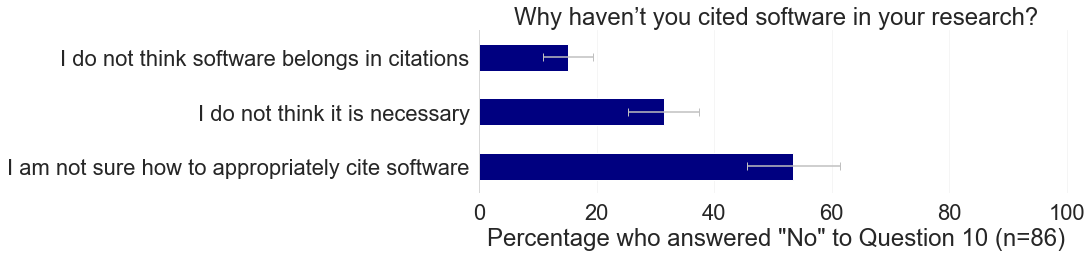

In [78]:
fig6 = data11_percentages.plot.barh(figsize=(14.4, 3), stacked=False, legend=False, cmap=sns.light_palette("Navy", as_cmap=True, reverse=True), xerr=data11_percent_err, ecolor='silver', capsize=4)
fig6.grid(False)
fig6.grid(axis='x', color='whitesmoke')
fig6.set_title('Why haven’t you cited software in your research?')
fig6.set_xlabel('Percentage who answered "No" to Question 10 (n='+str(total_number)+')')
fig6.axvline(0, color='lightgray', lw=1.75)
fig6.set_xlim(0.0, 101.0)
fig6.set_aspect(9.25)
fig6.spines['top'].set_visible(False)
fig6.spines['right'].set_visible(False)
fig6.spines['bottom'].set_visible(False)
fig6.spines['left'].set_visible(False)
fig6.figure.savefig("Figure6.png",bbox_inches='tight',dpi=300)

In [79]:
print((not_interested_numbers)/(len(df))*100.,"plus or minus",(np.sqrt(not_interested_numbers))/(len(df))*100.,"percentage of respondents do not think software belongs in citations.")

3.571428571428571 plus or minus 0.990536064687909 percentage of respondents do not think software belongs in citations.


Conclusions:
* Most (73±4%) respondents have cited scientific software in their research, although only 42±3% do so routinely.
* Roughly a quarter (27±3%) never cite scientific software in their research. When asked why, about half (53±8%) responded that they do not know how to appropriately cite scientific software.
* 14 people do not believe software belongs in citations. This is 4±1% of the total sample.

# Question 12: On which of these have you run software for solar-physics research?

🔲 **Laptop / Desktop computer  
🔲 Shared workstation  
🔲 Local Cluster  
🔲 Regional or National Cluster  
🔲 GPU  
🔲 Commercial cloud**  

In [80]:
def count_all_the_hardware(list_of_all_values):
    """
    
    Input: list_of_all_values, list of lists containing all the responses to the question:
    "On which of these have you run software for solar-physics research?"
    
    """
    ld_count = 0
    work_count = 0
    lc_count = 0
    rnc_count = 0
    gpu_count = 0
    cc_count = 0
    for i in range(len(list_of_all_values)):
        single_row_list = list_of_all_values[i].split(", ")
        if "Laptop / Desktop computer" in single_row_list:
            ld_count += 1
        if "Shared workstation" in single_row_list:
            work_count += 1
        if "Local Cluster" in single_row_list:
            lc_count += 1
        if "Regional or National Cluster" in single_row_list:
            rnc_count += 1
        if "GPU" in single_row_list:
            gpu_count += 1
        if "Commercial cloud" in single_row_list:
            cc_count += 1           
    hardware_names = ["Laptop / Desktop computer", "Shared workstation", "Local Cluster", "Regional or National Cluster", "GPU", "Commercial cloud"]
    user_counts = [ld_count, work_count, lc_count, rnc_count, gpu_count, cc_count]
    return user_counts 

### Compute Resources vs. Career

In [81]:
# All Participants
list_of_all_values_all = df['On which of these have you run software for solar-physics research?'].tolist()
user_counts_all = np.array(count_all_the_hardware(list_of_all_values_all))
user_percentages_all = (user_counts_all/total_responses) * 100.

# Faculty, Staff Scientist, or Researcher
fssr = df['How would you describe the stage of your career?'] == 'Faculty, Staff Scientist, or Researcher'
list_of_all_values_fssr = df['On which of these have you run software for solar-physics research?'][fssr].tolist()
user_counts_fssr = np.array(count_all_the_hardware(list_of_all_values_fssr))
user_percentages_fssr = (np.array(user_counts_fssr)/(total_numbers['Total Numbers']['Faculty, Staff Scientist, or Researcher'])) * 100.

# Postdocs
postdoc = df['How would you describe the stage of your career?'] == 'Postdoc'
list_of_all_values_pd = df['On which of these have you run software for solar-physics research?'][postdoc].tolist()
user_counts_pd = np.array(count_all_the_hardware(list_of_all_values_pd))
user_percentages_pd = (np.array(user_counts_pd)/(total_numbers['Total Numbers']['Postdoc'])) * 100.

# Graduate or Undergraduate Students
gs = df['How would you describe the stage of your career?'] == 'Graduate or Undergraduate Student'
list_of_all_values_gs = df['On which of these have you run software for solar-physics research?'][gs].tolist()
user_counts_gs = np.array(count_all_the_hardware(list_of_all_values_gs))
user_percentages_gs = (np.array(user_counts_gs)/(total_numbers['Total Numbers']['Graduate or Undergraduate Student'])) * 100.

# Software or Instrument Developers
us = df['How would you describe the stage of your career?'] == 'Software or Instrument Developer'
list_of_all_values_us = df['On which of these have you run software for solar-physics research?'][us].tolist()
user_counts_us = np.array(count_all_the_hardware(list_of_all_values_us))
user_percentages_us = (np.array(user_counts_us)/(total_numbers['Total Numbers']['Software or Instrument Developer'])) * 100.

In [82]:
hardware_names = ["Laptop / Desktop computer", "Shared workstation", "Local Cluster", "Regional or National Cluster", "GPU", "Commercial cloud"]

df12 = pd.DataFrame({'All Participants': list(user_percentages_all), 
                    'Faculty, Staff Scientist, or Researcher': list(user_percentages_fssr), 
                    'Postdoc': list(user_percentages_pd),
                    'Graduate or Undergraduate Student': list(user_percentages_gs),
                    'Software or Instrument Developer': list(user_percentages_us)},
                    index=hardware_names)
df12

,All Participants,"Faculty, Staff Scientist, or Researcher",Postdoc,Graduate or Undergraduate Student,Software or Instrument Developer
Laptop / Desktop computer,95.879121,95.609756,98.113208,94.047619,100.000000
Shared workstation,39.560440,42.439024,33.962264,32.142857,54.545455
Local Cluster,51.098901,45.365854,58.490566,60.714286,50.000000
Regional or National Cluster,14.010989,19.024390,11.320755,7.142857,0.000000
GPU,8.516484,10.731707,1.886792,5.952381,13.636364
Commercial cloud,4.945055,4.878049,3.773585,5.952381,4.545455


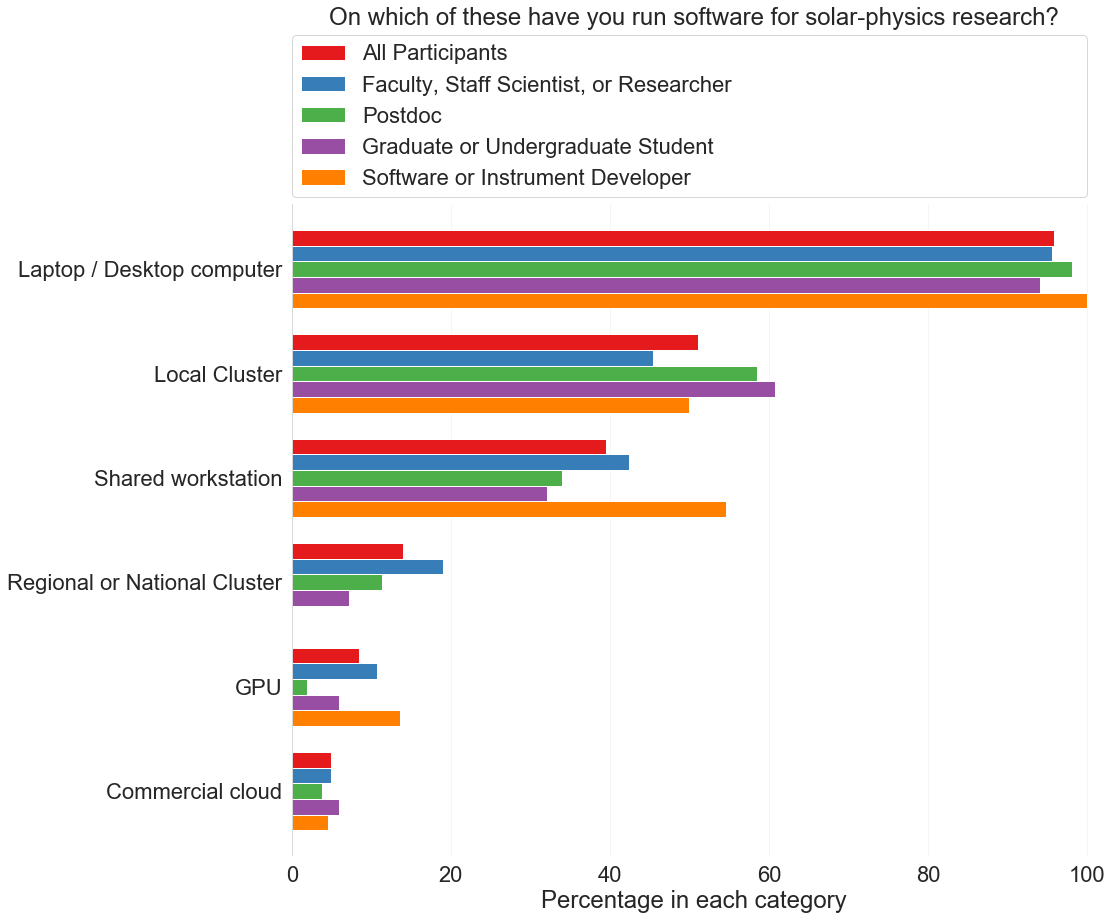

In [83]:
fig7a = df12.sort_values(by='All Participants', ascending=False).plot.barh(figsize=(14.4, 12),
                                                                           cmap=ListedColormap(sns.color_palette("Set1", 5).as_hex()),
                                                                           stacked=False, width=0.75)
fig7a.grid(False)
fig7a.grid(axis='x', color='whitesmoke')
fig7a.set_title('On which of these have you run software for solar-physics research?', y=1.265)
fig7a.set_xlabel('Percentage in each category')
fig7a.set_xlim(0.0, 101.0)
fig7a.axvline(0, color='lightgray', lw=1.75)
fig7a.invert_yaxis()
fig7a.legend(bbox_to_anchor=(0., 1.01, 0.99, .101), loc='lower left', mode="expand", borderaxespad=0., ncol=1)
fig7a.spines['top'].set_visible(False)
fig7a.spines['right'].set_visible(False)
fig7a.spines['bottom'].set_visible(False)
fig7a.spines['left'].set_visible(False)
fig7a.figure.savefig("Figure7a.png",bbox_inches='tight',dpi=300)

### Compute Resources vs. Expertise

In [84]:
# Observational (Space-Based)
space = df['Which of these areas of solar physics do you work in? Check all that apply.'].str.contains('Space-Based')
list_of_all_values_space= df['On which of these have you run software for solar-physics research?'][space].tolist()
total_space = len(list_of_all_values_space)
user_counts_space = np.array(count_all_the_hardware(list_of_all_values_space))
user_percentages_space = (np.array(user_counts_space)/total_space) * 100.

# Observational (Ground-Based)
obs = df['Which of these areas of solar physics do you work in? Check all that apply.'].str.contains('Ground-Based')
list_of_all_values_obs= df['On which of these have you run software for solar-physics research?'][obs].tolist()
total_obs = len(list_of_all_values_obs)
user_counts_obs = count_all_the_hardware(list_of_all_values_obs)
user_percentages_obs = (np.array(user_counts_obs)/total_obs) * 100.

# Instrumentation
inst = df['Which of these areas of solar physics do you work in? Check all that apply.'].str.contains('Instrumentation')
list_of_all_values_inst= df['On which of these have you run software for solar-physics research?'][inst].tolist()
total_inst = len(list_of_all_values_inst)
user_counts_inst = count_all_the_hardware(list_of_all_values_inst)
user_percentages_inst = (np.array(user_counts_inst)/total_inst) * 100.

# Numerical Simulations
sim = df['Which of these areas of solar physics do you work in? Check all that apply.'].str.contains('Numerical Simulations')
list_of_all_values_sim = df['On which of these have you run software for solar-physics research?'][sim].tolist()
total_sim = len(list_of_all_values_sim)
user_counts_sim = count_all_the_hardware(list_of_all_values_sim)
user_percentages_sim = (np.array(user_counts_sim)/total_sim) * 100.

# Theory
theory = df['Which of these areas of solar physics do you work in? Check all that apply.'].str.contains('Theory')
list_of_all_values_theory = df['On which of these have you run software for solar-physics research?'][theory].tolist()
total_theory = len(list_of_all_values_theory)
user_counts_theory = count_all_the_hardware(list_of_all_values_theory)
user_percentages_theory = (np.array(user_counts_theory)/total_theory) * 100.

In [85]:
df12a = pd.DataFrame({'Observational (Space-Based)': list(user_percentages_space), 
                    'Observational (Ground-Based)': list(user_percentages_obs), 
                    'Instrumentation': list(user_percentages_inst),
                    'Numerical Simulations': list(user_percentages_sim),
                    'Theory': list(user_percentages_theory)},
                    index=hardware_names)
df12a

,Observational (Space-Based),Observational (Ground-Based),Instrumentation,Numerical Simulations,Theory
Laptop / Desktop computer,96.363636,97.633136,97.849462,95.906433,93.333333
Shared workstation,41.454545,44.970414,48.387097,41.520468,38.095238
Local Cluster,49.090909,52.662722,45.161290,62.573099,60.000000
Regional or National Cluster,9.818182,12.426036,5.376344,26.315789,25.714286
GPU,9.090909,7.692308,3.225806,11.695906,13.333333
Commercial cloud,5.818182,4.733728,7.526882,3.508772,4.761905


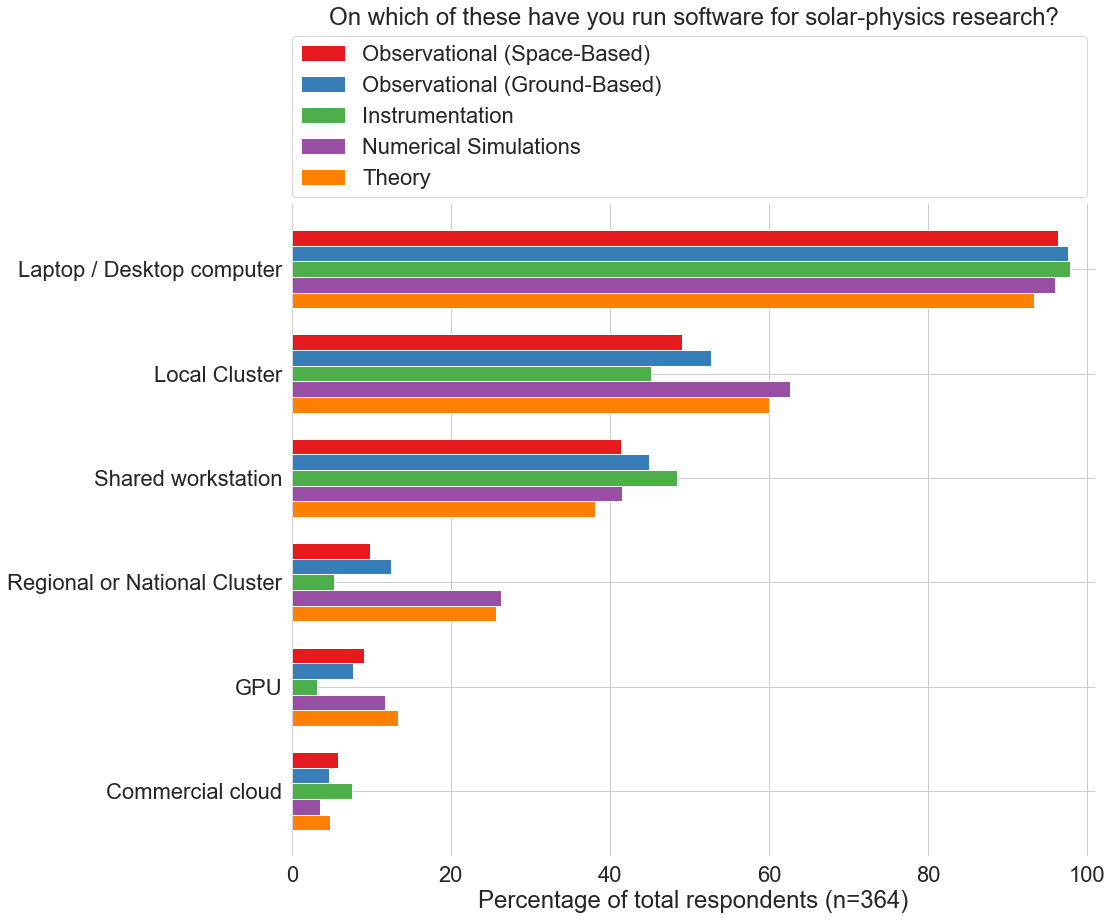

In [86]:
fig7b = df12a.sort_values(by='Numerical Simulations', ascending=False).plot.barh(figsize=(14.4, 12),
                                                                                 cmap=ListedColormap(sns.color_palette("Set1", 5).as_hex()),
                                                                                 stacked=False, width=0.75)
fig7a.grid(False)
fig7a.grid(axis='x', color='whitesmoke')
fig7b.set_title('On which of these have you run software for solar-physics research?', y=1.265)
fig7b.set_xlabel('Percentage of total respondents (n=364)')
fig7b.set_xlim(0.0, 101.0)
fig7b.axvline(0, color='lightgray', lw=1.75)
fig7b.invert_yaxis()
fig7b.legend(bbox_to_anchor=(0., 1.01, 0.99, .101), loc='lower left', mode="expand", borderaxespad=0., ncol=1)
fig7b.spines['top'].set_visible(False)
fig7b.spines['right'].set_visible(False)
fig7b.spines['bottom'].set_visible(False)
fig7b.spines['left'].set_visible(False)
fig7b.figure.savefig("Figure7b.png",bbox_inches='tight',dpi=300)

In [87]:
personal_only_numbers = len(df.loc[df['On which of these have you run software for solar-physics research?'] == 'Laptop / Desktop computer'])
print("Percentage of people who only responded with laptop/desktop:",(personal_only_numbers/total_responses)*100.)

Percentage of people who only responded with laptop/desktop: 28.846153846153843


In [88]:
no_laptop = ~df['On which of these have you run software for solar-physics research?'].str.contains('Laptop')
yes_laptop = df['On which of these have you run software for solar-physics research?'].str.contains('Laptop')

Indeed, 15 people do not use their personal laptops or desktops at all:

In [89]:
df[no_laptop]

,Which of these areas of solar physics do you work in? Check all that apply.,How would you describe the stage of your career?,What country is your institution in?,Do you self-identify as one or more underrepresented minorities in solar physics? This question is optional.,Do you self-identify as a unrepresented gender identity in Solar Physics? This question is optional.,Do you use software in your research?,Have you had formal training in programming?,Which of the following statements is most applicable to you?,Which of the following have you personally utilized in your work within the last year?,Have you cited software papers in your published research?,Why haven’t you cited software in your research?,On which of these have you run software for solar-physics research?,Breadth
100,"Observational (Space-Based), Numerical Simulat...","Faculty, Staff Scientist, or Researcher",United States,No,No,Yes,No,Somewhere in between.,"IDL, Python, Fortran, Github (or similar)",Yes,NaN,Shared workstation,4
111,"Observational (Space-Based), Observational (Gr...","Faculty, Staff Scientist, or Researcher",United Kingdom,No,No,Yes,"Yes, a little (e.g. online classes, books, wor...",Somewhere in between.,"IDL, SolarSoft, Python, Shell scripting, Fortran",Sometimes,NaN,Shared workstation,5
158,"Observational (Space-Based), Observational (Gr...","Faculty, Staff Scientist, or Researcher",Slovakia,NaN,NaN,Yes,"Yes, a lot (e.g. CS courses at an undergraduat...",Somewhere in between.,"IDL, SolarSoft",Yes,NaN,Shared workstation,2
182,"Observational (Space-Based), Observational (Gr...","Faculty, Staff Scientist, or Researcher",Japan,Yes,No,Yes,"Yes, a little (e.g. online classes, books, wor...",I mostly use software written by others.,"IDL, SolarSoft",No,I am not sure how to appropriately cite software,Shared workstation,2
191,Theory,"Faculty, Staff Scientist, or Researcher",India,NaN,NaN,Yes,"Yes, a lot (e.g. CS courses at an undergraduat...",Somewhere in between.,"C, Fortran, R, Mathematica",Sometimes,NaN,Local Cluster,4
204,"Observational (Space-Based), Numerical Simulat...",Graduate or Undergraduate Student,Germany,No,No,Yes,"Yes, a lot (e.g. CS courses at an undergraduat...",I write mostly my own software.,"Python, Mathematica",No,I am not sure how to appropriately cite software,Local Cluster,2
205,Theory,"Faculty, Staff Scientist, or Researcher",Germany,No,Yes,Yes,No,Somewhere in between.,"IDL, SolarSoft",No,I am not sure how to appropriately cite software,"Shared workstation, Local Cluster",2
209,Numerical Simulations,Graduate or Undergraduate Student,Germany,No,No,Yes,"Yes, a lot (e.g. CS courses at an undergraduat...",I write mostly my own software.,"Python, MATLAB",No,I do not think it is necessary,Local Cluster,2
212,"Numerical Simulations, Theory",Graduate or Undergraduate Student,Germany,NaN,NaN,Yes,No,Somewhere in between.,R,Yes,NaN,"Shared workstation, Local Cluster",1
217,"Numerical Simulations, Theory",Graduate or Undergraduate Student,United States,No,No,Yes,"Yes, a lot (e.g. CS courses at an undergraduat...",Somewhere in between.,"IDL, Fortran",Sometimes,NaN,Regional or National Cluster,2


Conclusions:
* Hardware choices vary significantly across area of expertise.
    * A greater percentage of people doing numerical simulations + theory utilize local clusters (63% and 60%, respectively, compared with 51% overall).
    * A greater percentage of people doing numerical simulations + theory utilize regional/national clusters (26% and 26%, respectively, compared with 14% overall). 
* Everyone relies on their personal machine. 29% of respondents rely exclusively on their personal machine.
* The solar physics community puts a lot of effort into building and maintaining their own local clusters and workstations. Most respondents who want additional computational resources use a shared workstation or local cluster. Half the respondents have experience working with a local cluster. 
* Most of the respondents do not utilize pre-existing infrastructure:
    * 5% of respondents have experience using the commercial cloud.
    * 14% of respondents have experience using a regional/national cluster. (However, some countries like the United States require citizenship or permanent residence status to use these clusters).

# Question 13: Do you have any comments? 
**(This is a free form response; comments are not required. Please feel free to give us feedback about topics like: version control, collaborative coding platforms such as Github, standard or best practices in coding, operating systems, text editors, or your personal experience with writing code and releasing software, or general thoughts about SunPy).**

In [90]:
df_comments = pd.read_csv('free_form_comments.csv')

In [91]:
for i in range(len(df_comments)):
    print(df_comments['Do you have any comments? (This is a free form response; comments are not required. Please feel free to give us feedback about topics like: version control, collaborative coding platforms such as Github, standard or best practices in coding, operating systems, text editors, or your personal experience with writing code and releasing software, or general thoughts about SunPy).'][i])
    print("")

Only wish that some formal programming training was standard in the undergrad/grad curriculum. 

I think version control and backward compatibility may be taken into some more serious consideration as SunPy goes into future. Sometimes I got frustrated as some scripts I wrote that utilize functions from earlier versions of SunPy do not work anymore after updating SunPy to a newer version.

SunPy is great and I do 95% of my coding in Python. But I still have to use IDL/SolarSoft for the aia_prep function because I am under the impression the equivalent function in SunPy does not produce the same results. This single routine means I still require an IDL license. 

I've not published any papers yet.

The barriers between creating a work flow on a personal workstation and commercial/private cloud are significant. I am not sure where to begin transitioning from using everything local to making use of a cloud environment. 

I shifted from IDL/SSW to Python/Sunpy when I moved to the private un